In [1]:
import sys
import pickle
import pandas as pd
import numpy as np
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tester import test_classifier, dump_classifier_and_data

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format', lambda x: '%.3f' % x)  

In [3]:
# 载入数据
data_dict = pickle.load(open("final_project_dataset.pkl", "r") ) 
data_df = pd.DataFrame(data_dict)

In [4]:
data_df.head(10)

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
person_df=data_df.transpose()
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [6]:
np.any(person_df.isnull())

False

In [7]:
person_df.replace('NaN',np.nan,inplace=True)

In [8]:
np.any(person_df.isnull())
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

In [9]:
len(person_df.loc[person_df['poi']==True])
# 查看总共有多少目标标记为POI

18

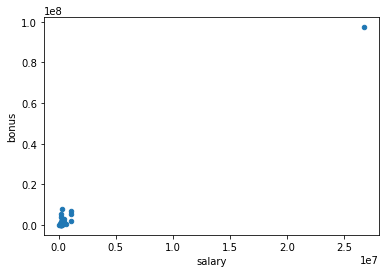

In [10]:
# 检查异常值并剔除
person_df.plot.scatter(x='salary',y='bonus')
plt.show()

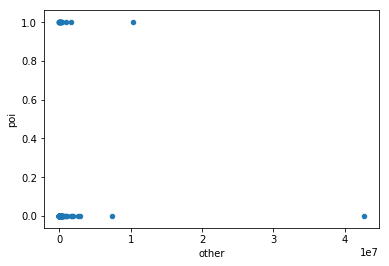

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.000,32083396.000,-27992891.000,1398517.000,NaN,311764000.000,5235198.000,nan,nan,nan,...,48521928.000,42667589.000,False,130322299.000,-7576788.000,26704229.000,nan,nan,309886585.000,434509511.000


In [11]:
person_df[['poi','other']]
person_df.plot.scatter(x='other',y='poi')
plt.show()
person_df.loc[person_df['other']==person_df['other'].max()]
# other的异常值也是total

In [12]:
# 剔除异常值
total=person_df.query('index=="TOTAL"')
person_df.drop(['TOTAL'],inplace=True)

### 抛弃特征

In [13]:
# 没有任何数据缺失的对象
print(person_df.dropna(how='any'))
# 完全没有

Empty DataFrame
Columns: [bonus, deferral_payments, deferred_income, director_fees, email_address, exercised_stock_options, expenses, from_messages, from_poi_to_this_person, from_this_person_to_poi, loan_advances, long_term_incentive, other, poi, restricted_stock, restricted_stock_deferred, salary, shared_receipt_with_poi, to_messages, total_payments, total_stock_value]
Index: []

[0 rows x 21 columns]


In [14]:
person_df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,True,False,True,True,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,False,False
BANNANTINE JAMES M,True,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,True,False,True,True,False,False
BAY FRANKLIN R,False,False,False,True,False,True,False,True,True,True,...,True,False,False,False,False,False,True,True,False,False
BAZELIDES PHILIP J,True,False,True,True,True,False,True,True,True,True,...,False,False,False,True,True,False,True,True,False,False
BECK SALLY W,False,True,True,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELFER ROBERT,True,False,True,False,True,False,True,True,True,True,...,True,True,False,True,False,True,True,True,False,False
BERBERIAN DAVID,True,True,True,True,False,False,False,True,True,True,...,True,True,False,False,True,False,True,True,False,False


缺失超过一般的特征由于数量不够而且部分数据比如restricted_stock_deferred的对象里完全没有poi，因此容易对最后的结果造成很大的误导故不选作为训练特征。  
保留下的特征有  
email_address                111 non-null object  
exercised_stock_options      102 non-null float64  
expenses                     95 non-null float64  
from_messages                86 non-null float64  
from_poi_to_this_person      86 non-null float64  
from_this_person_to_poi      86 non-null float64  
other                        93 non-null float64  
restricted_stock             110 non-null float64  
salary                       95 non-null float64  
shared_receipt_with_poi      86 non-null float64  
to_messages                  86 non-null float64  
total_payments               125 non-null float64  
total_stock_value            126 non-null float64  

接着移除email_address原因是与结果无关，
剔除的特征有  
email_address                111 non-null object   
deferral_payments            39 non-null float64  
deferred_income              49 non-null float64  
director_fees                17 non-null float64  
loan_advances                4 non-null float64  
long_term_incentive          66 non-null float64  
restricted_stock_deferred    18 non-null float64  


In [15]:
# person_df[['poi','restricted_stock_deferred']].dropna(how='any')
# person_df[['poi','deferred_income']].dropna(how='any')
# 剔除特征
person_df.drop(['email_address','deferral_payments','deferred_income','director_fees','loan_advances','long_term_incentive','restricted_stock_deferred'],axis=1, inplace=True)

In [16]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 14 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
from_messages              86 non-null float64
from_poi_to_this_person    86 non-null float64
from_this_person_to_poi    86 non-null float64
other                      92 non-null float64
poi                        145 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
to_messages                86 non-null float64
total_payments             124 non-null float64
total_stock_value          125 non-null float64
dtypes: bool(1), float64(13)
memory usage: 16.0+ KB


### 新建特征

In [17]:
person_df['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

In [18]:
# 确认有数据的是否都是这四个特征同时拥有数据
print(len(person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']].dropna(how='any')))
# 根据结果一致表明是这样，将这四个特征转化为from_ratio和to_ratio

86


In [19]:
person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']]

,from_this_person_to_poi,from_messages,from_poi_to_this_person,to_messages
ALLEN PHILLIP K,65.000,2195.000,47.000,2902.000
BADUM JAMES P,nan,nan,nan,nan
BANNANTINE JAMES M,0.000,29.000,39.000,566.000
BAXTER JOHN C,nan,nan,nan,nan
BAY FRANKLIN R,nan,nan,nan,nan
BAZELIDES PHILIP J,nan,nan,nan,nan
BECK SALLY W,386.000,4343.000,144.000,7315.000
BELDEN TIMOTHY N,108.000,484.000,228.000,7991.000
BELFER ROBERT,nan,nan,nan,nan
BERBERIAN DAVID,nan,nan,nan,nan


In [20]:
temp_df=person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']].dropna(how='any')
person_df['from_ratio']=temp_df['from_this_person_to_poi']/temp_df['from_messages']
person_df['to_ratio']=temp_df['from_poi_to_this_person']/temp_df['to_messages']

In [21]:
print(person_df[['from_ratio','to_ratio']])

                               from_ratio  to_ratio
ALLEN PHILLIP K                     0.030     0.016
BADUM JAMES P                         nan       nan
BANNANTINE JAMES M                  0.000     0.069
BAXTER JOHN C                         nan       nan
BAY FRANKLIN R                        nan       nan
BAZELIDES PHILIP J                    nan       nan
BECK SALLY W                        0.089     0.020
BELDEN TIMOTHY N                    0.223     0.029
BELFER ROBERT                         nan       nan
BERBERIAN DAVID                       nan       nan
BERGSIEKER RICHARD P                0.000     0.010
BHATNAGAR SANJAY                    0.034     0.000
BIBI PHILIPPE A                     0.200     0.014
BLACHMAN JEREMY M                   0.143     0.010
BLAKE JR. NORMAN P                    nan       nan
BOWEN JR RAYMOND M                  0.556     0.075
BROWN MICHAEL                       0.024     0.009
BUCHANAN HAROLD G                   0.000     0.000
BUTTS ROBERT

In [22]:
# 用平均数来填补空值
person_df['from_ratio'].fillna(person_df['from_ratio'].mean(),inplace=True)
person_df['to_ratio'].fillna(person_df['to_ratio'].mean(),inplace=True)

In [23]:
# 剔除'from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages'四个特征
person_df.drop(['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages'],axis=1, inplace=True)

In [24]:
person_df.head()

,bonus,exercised_stock_options,expenses,other,poi,restricted_stock,salary,shared_receipt_with_poi,total_payments,total_stock_value,from_ratio,to_ratio
ALLEN PHILLIP K,4175000.000,1729541.000,13868.000,152.000,False,126027.000,201955.000,1407.000,4484442.000,1729541.000,0.030,0.016
BADUM JAMES P,nan,257817.000,3486.000,nan,False,nan,nan,nan,182466.000,257817.000,0.184,0.038
BANNANTINE JAMES M,nan,4046157.000,56301.000,864523.000,False,1757552.000,477.000,465.000,916197.000,5243487.000,0.000,0.069
BAXTER JOHN C,1200000.000,6680544.000,11200.000,2660303.000,False,3942714.000,267102.000,nan,5634343.000,10623258.000,0.184,0.038
BAY FRANKLIN R,400000.000,nan,129142.000,69.000,False,145796.000,239671.000,nan,827696.000,63014.000,0.184,0.038


### 特征缩放

In [25]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 12 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
other                      92 non-null float64
poi                        145 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
total_payments             124 non-null float64
total_stock_value          125 non-null float64
from_ratio                 145 non-null float64
to_ratio                   145 non-null float64
dtypes: bool(1), float64(11)
memory usage: 13.7+ KB


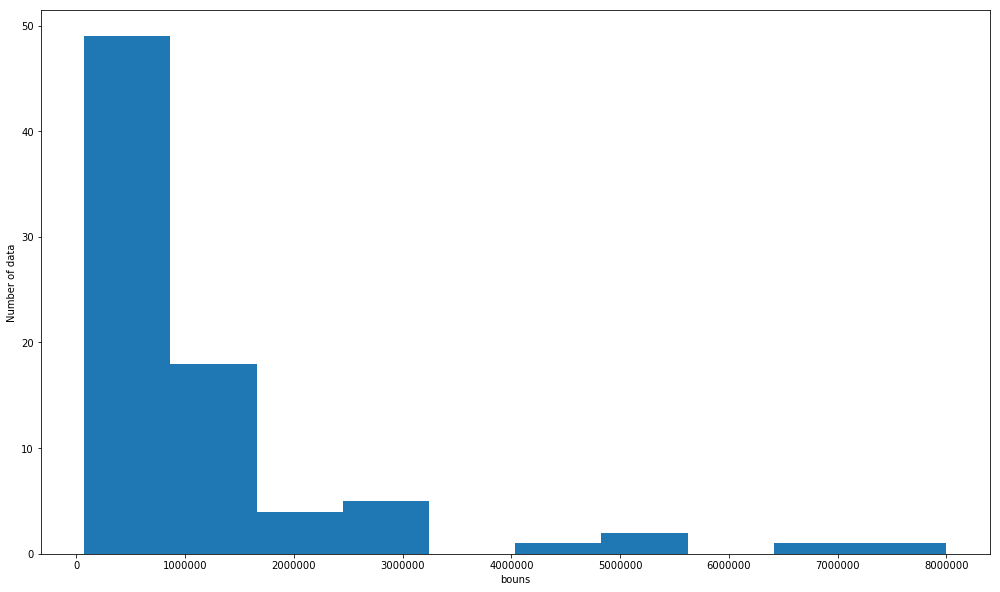

In [26]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['bonus'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('bouns')  
plt.show()

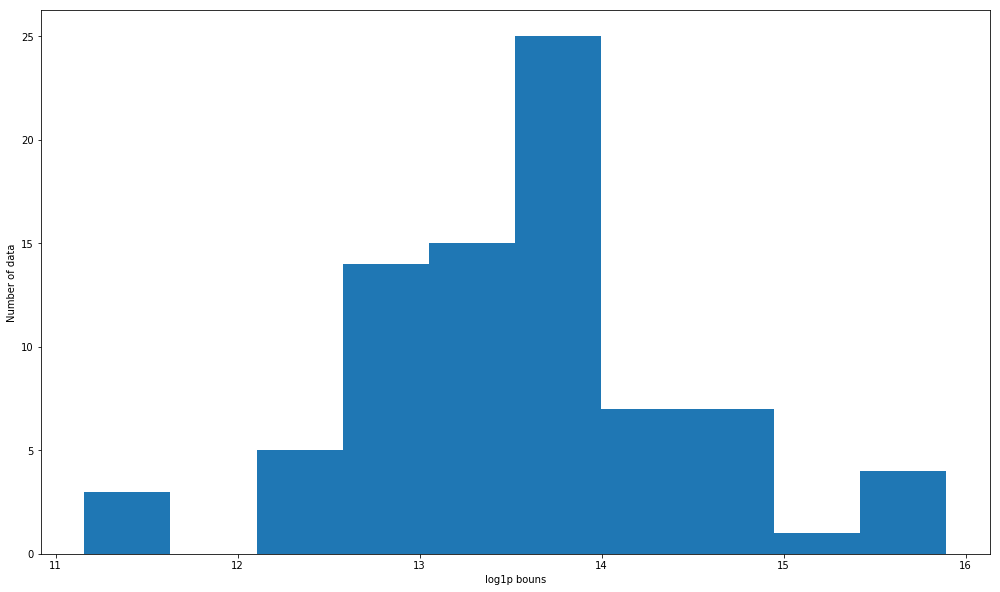

In [27]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(np.log1p(person_df['bonus'].dropna()))
plt.ylabel('Number of data')  
plt.xlabel('log1p bouns')  
plt.show()

In [28]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['bonus']=np.log1p(person_df['bonus'])
person_df['bonus'].fillna(person_df['bonus'].mean(),inplace=True)

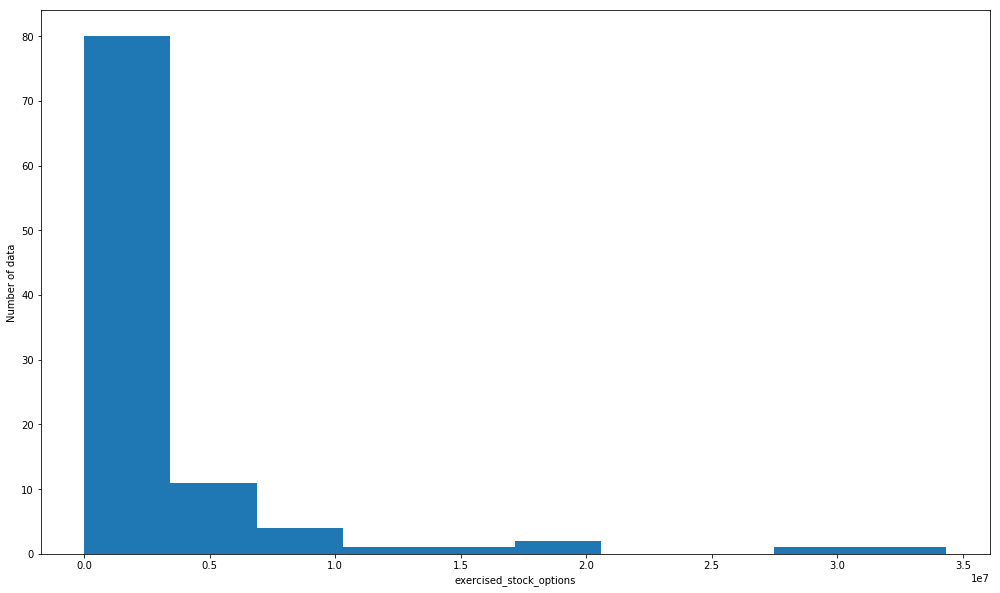

In [29]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['exercised_stock_options'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('exercised_stock_options')  
plt.show()

In [30]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['exercised_stock_options']=np.log1p(person_df['exercised_stock_options'])
person_df['exercised_stock_options'].fillna(person_df['exercised_stock_options'].mean(),inplace=True)

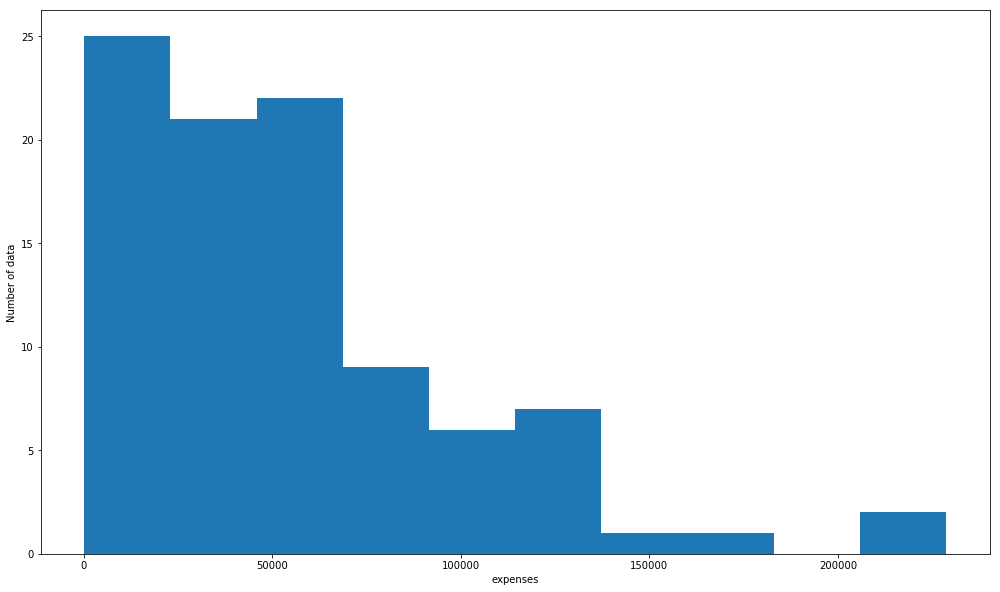

In [31]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['expenses'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('expenses')  
plt.show()

In [32]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['expenses']=np.log1p(person_df['expenses'])
person_df['expenses'].fillna(person_df['expenses'].mean(),inplace=True)

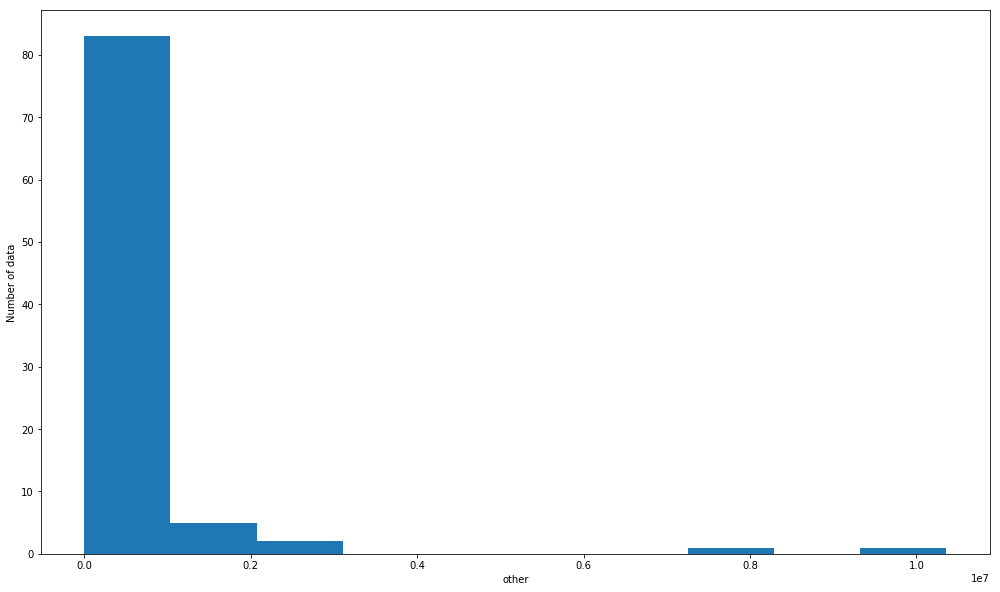

In [33]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['other'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('other')  
plt.show()

In [34]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['other']=np.log1p(person_df['other'])
person_df['other'].fillna(person_df['other'].mean(),inplace=True)

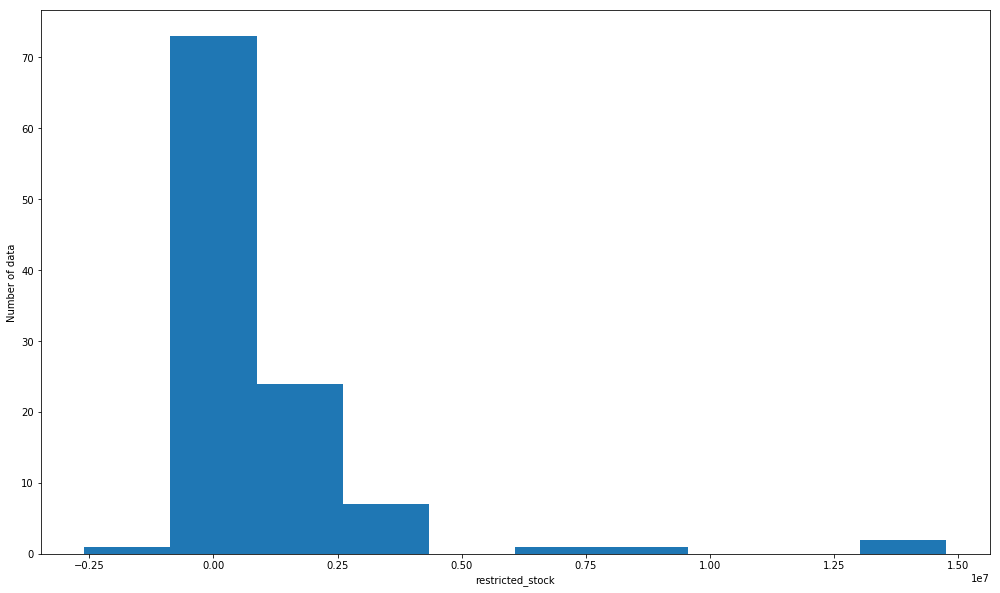

In [35]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['restricted_stock'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('restricted_stock')  
plt.show()

In [36]:
person_df['restricted_stock'].sort_values()

BHATNAGAR SANJAY                -2604490.000
CHAN RONNIE                        32460.000
JAEDICKE ROBERT                    44093.000
PIRO JIM                           47304.000
GILLIS JOHN                        75838.000
MCCARTY DANNY J                    94556.000
DIMICHELE RICHARD G               126027.000
KAMINSKI WINCENTY J               126027.000
CALGER CHRISTOPHER F              126027.000
ALLEN PHILLIP K                   126027.000
BECK SALLY W                      126027.000
DEFFNER JOSEPH M                  141833.000
BAY FRANKLIN R                    145796.000
HAYES ROBERT E                    151418.000
LOWRY CHARLES P                   153686.000
BELDEN TIMOTHY N                  157569.000
MORAN MICHAEL P                   161602.000
DURAN WILLIAM D                   189041.000
BLACHMAN JEREMY M                 189041.000
BUCHANAN HAROLD G                 189041.000
MURRAY JULIA H                    196983.000
REYNOLDS LAWRENCE                 201483.000
CUMBERLAND

In [37]:
# 存在一个负值很奇怪，限制权股票我觉得不太可能是负数有可能是采集出错我将它转化为正数
person_df.loc[person_df.index=='BHATNAGAR SANJAY','restricted_stock']=abs(person_df['restricted_stock']['BHATNAGAR SANJAY'])

In [38]:
person_df['restricted_stock']['BHATNAGAR SANJAY']

2604490.0

In [39]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['restricted_stock']=np.log1p(person_df['restricted_stock'])
person_df['restricted_stock'].fillna(person_df['restricted_stock'].mean(),inplace=True)

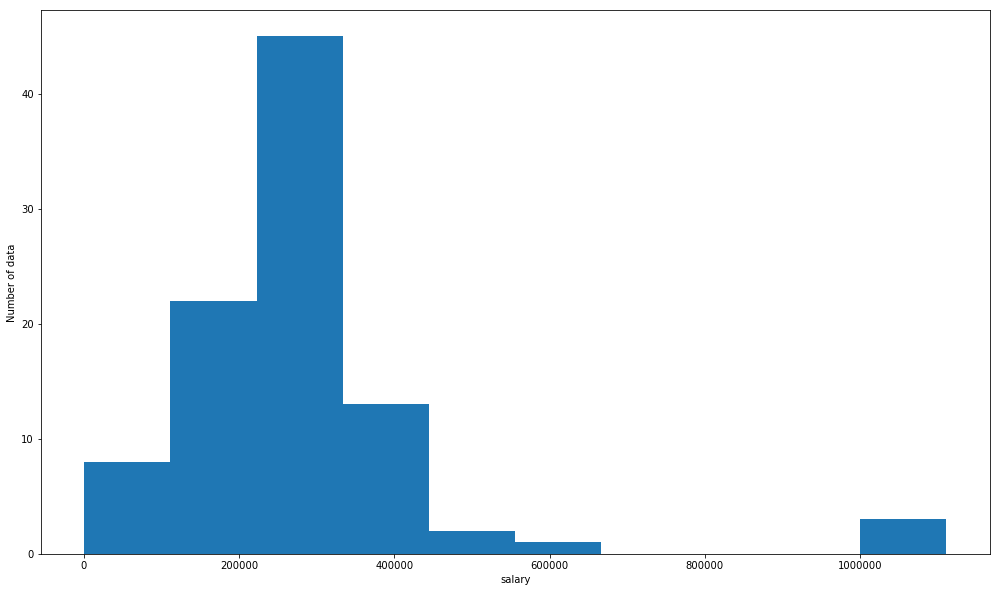

In [40]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['salary'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('salary')  
plt.show()

In [41]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['salary']=np.log1p(person_df['salary'])
person_df['salary'].fillna(person_df['salary'].mean(),inplace=True)

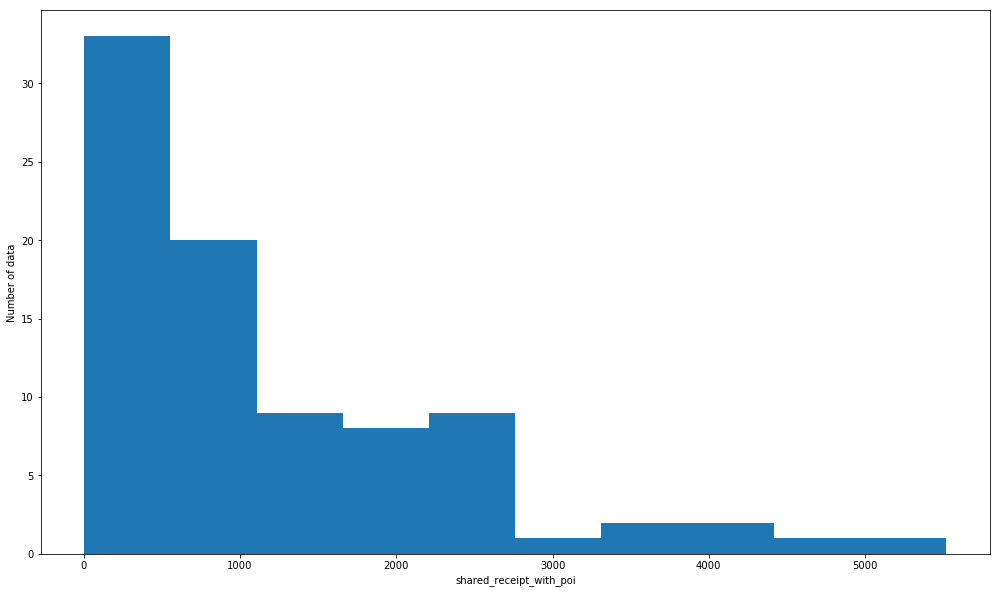

In [42]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['shared_receipt_with_poi'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('shared_receipt_with_poi')  
plt.show()

In [43]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['shared_receipt_with_poi']=np.log1p(person_df['shared_receipt_with_poi'])
person_df['shared_receipt_with_poi'].fillna(person_df['shared_receipt_with_poi'].mean(),inplace=True)

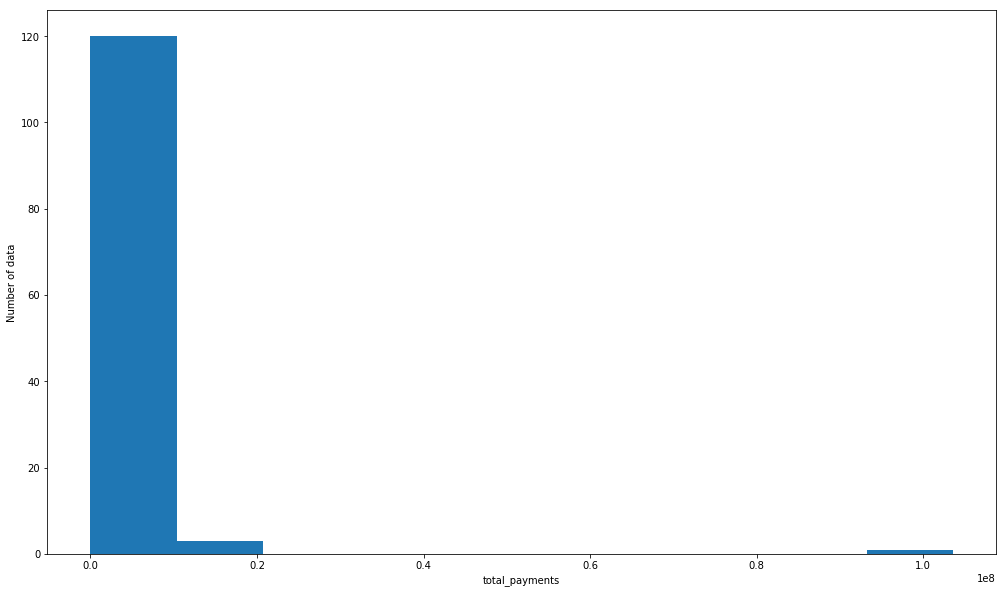

In [44]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['total_payments'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('total_payments')  
plt.show()

In [45]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['total_payments']=np.log1p(person_df['total_payments'])
person_df['total_payments'].fillna(person_df['total_payments'].mean(),inplace=True)

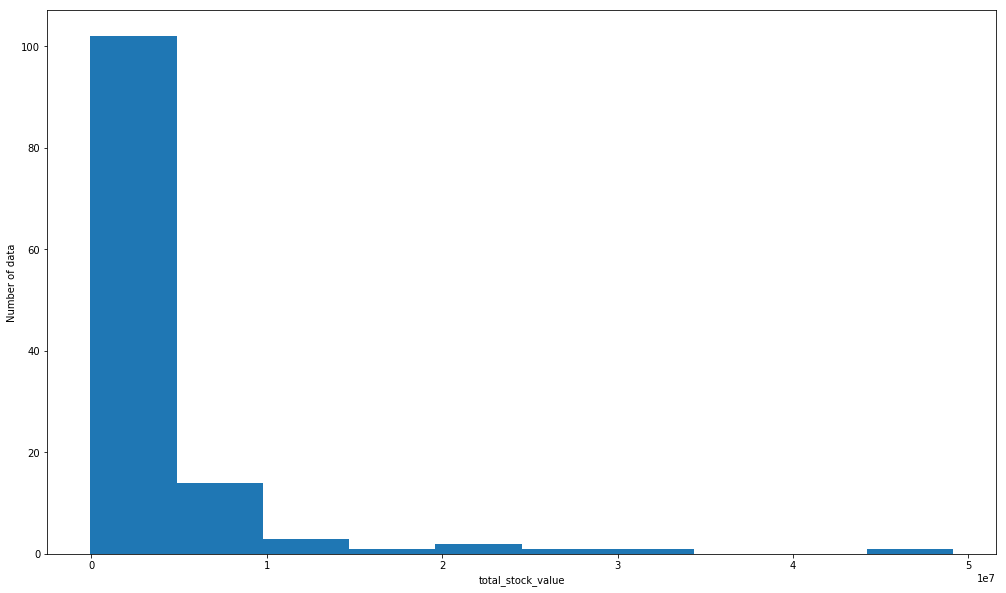

In [46]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['total_stock_value'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('total_stock_value')  
plt.show()

In [47]:
person_df['total_stock_value'].sort_values()

BELFER ROBERT                     -44093.000
PICKERING MARK R                   28798.000
PIRO JIM                           47304.000
BAY FRANKLIN R                     63014.000
GILLIS JOHN                        85641.000
WHALEY DAVID A                     98718.000
BECK SALLY W                      126027.000
CALGER CHRISTOPHER F              126027.000
WROBEL BRUCE                      139130.000
HAYES ROBERT E                    151418.000
DEFFNER JOSEPH M                  159211.000
FUGH JOHN L                       176378.000
CLINE KENNETH W                   189518.000
YEAP SOON                         192758.000
CUMBERLAND MICHAEL S              207940.000
MORDAUNT KRISTINA M               208510.000
MORAN MICHAEL P                   221141.000
BOWEN JR RAYMOND M                252055.000
BADUM JAMES P                     257817.000
GAHN ROBERT S                     318607.000
FOY JOE                           343434.000
HAYSLETT RODERICK J               346663.000
LEFF DANIE

In [48]:
# 存在一个负值很奇怪，将其做绝对值处理
person_df.loc[person_df.index=='BELFER ROBERT','total_stock_value']=abs(person_df['total_stock_value']['BELFER ROBERT'])

In [49]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['total_stock_value']=np.log1p(person_df['total_stock_value'])
person_df['total_stock_value'].fillna(person_df['total_stock_value'].mean(),inplace=True)

In [50]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 12 columns):
bonus                      145 non-null float64
exercised_stock_options    145 non-null float64
expenses                   145 non-null float64
other                      145 non-null float64
poi                        145 non-null bool
restricted_stock           145 non-null float64
salary                     145 non-null float64
shared_receipt_with_poi    145 non-null float64
total_payments             145 non-null float64
total_stock_value          145 non-null float64
from_ratio                 145 non-null float64
to_ratio                   145 non-null float64
dtypes: bool(1), float64(11)
memory usage: 18.7+ KB


In [51]:
features_list=['poi','bonus','exercised_stock_options','expenses','other','restricted_stock','salary','shared_receipt_with_poi','total_payments','total_stock_value','from_ratio','to_ratio']

In [52]:
data = featureFormat(person_df.to_dict(orient ='index'), features_list, sort_keys = True)
# person_df.to_dict(orient ='index')

In [53]:
labels, features = targetFeatureSplit(data)

### 选择算法

In [54]:
%%time
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2)
test_classifier(clf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.83607	Precision: 0.38599	Recall: 0.38850	F1: 0.38724	F2: 0.38800
	Total predictions: 15000	True positives:  777	False positives: 1236	False negatives: 1223	True negatives: 11764

Wall time: 1.08 s


In [55]:
%%time
# LinearSVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
test_classifier(clf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
	Accuracy: 0.78280	Precision: 0.16000	Recall: 0.14800	F1: 0.15377	F2: 0.15025
	Total predictions: 15000	True positives:  296	False positives: 1554	False negatives: 1704	True negatives: 11446

Wall time: 6.64 s


In [56]:
%%time
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
test_classifier(clf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list)

GaussianNB(priors=None)
	Accuracy: 0.81740	Precision: 0.34148	Recall: 0.39800	F1: 0.36758	F2: 0.38525
	Total predictions: 15000	True positives:  796	False positives: 1535	False negatives: 1204	True negatives: 11465

Wall time: 898 ms


In [57]:
%%time
# RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
test_classifier(clf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85680	Precision: 0.39518	Recall: 0.13950	F1: 0.20621	F2: 0.16023
	Total predictions: 15000	True positives:  279	False positives:  427	False negatives: 1721	True negatives: 12573

Wall time: 20.4 s


### 参数优化模型

In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
# DecisionTrees
parameters = {'min_samples_leaf':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5]}

dtclf = DecisionTreeClassifier()
scoring = ['precision', 'recall']
dtclf = GridSearchCV(dtclf, parameters,scoring='f1')
dtclf.fit(features, labels)
print dtclf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
dtclf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
test_classifier(dtclf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(dtclf, person_df.to_dict(orient ='index'), features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.85427	Precision: 0.44357	Recall: 0.36550	F1: 0.40077	F2: 0.37883
	Total predictions: 15000	True positives:  731	False positives:  917	False negatives: 1269	True negatives: 12083



### 加入交叉验证

In [63]:
from sklearn.model_selection import KFold, train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, train_size=0.8)

regressor = DecisionTreeClassifier()
parameters = {'min_samples_leaf':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5]}
# scoring_fnc = make_scorer(accuracy_score)
kfold = KFold(n_splits=10)

grid = GridSearchCV(regressor, parameters, scoring='f1', cv=kfold)
grid = grid.fit(X_train, y_train)
reg = grid.best_estimator_

for key in parameters.keys():
    print('%s: %d'%(key, reg.get_params()[key]))



min_samples_split: 3
min_samples_leaf: 1


In [75]:
dtclf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
test_classifier(dtclf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(dtclf, person_df.to_dict(orient ='index'), features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.84640	Precision: 0.41898	Recall: 0.39300	F1: 0.40557	F2: 0.39793
	Total predictions: 15000	True positives:  786	False positives: 1090	False negatives: 1214	True negatives: 11910

